<a href="https://colab.research.google.com/github/Alexgit999/AED_UE/blob/main/AED_actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD 2: Aplicación del análisis exploratorio de datos a diversas variables

# 1. INTRODUCCIÓN
a. Descripción de la base de datos seleccionada: contexto, origen y propósito.

https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

Al leerse la descripción en la página de Kaggle se puede ver que se trata de datos sobre el rendimiento académico de un conjunto de estudiantes, aunque en realidad se trata de datos no reales (los cuales posteriormente me han dado problemas para sacar relaciones y predicciones). Los datos de una encuesta real podrían sugerir hipótesis o nuevas preguntas.

Según Kaggle:

> *Este conjunto de datos simulados explora cómo los hábitos de vida afectan el rendimiento académico de los estudiantes. Con 1000 registros sintéticos de estudiantes y más de 15 características, como horas de estudio, patrones de sueño, uso de redes sociales, calidad de la dieta, salud mental y calificaciones de exámenes finales, es perfecto para proyectos de aprendizaje automático, análisis de regresión, agrupamiento y visualización de datos. Creado con patrones realistas para la práctica educativa.*


b. Descripción general de las variables incluidas en la base de datos.

El dataset consta de una única tabla de 16 columnas. Las variables se dividen en 6 de tipo decimal, 5 de tipo string, 3 de tipo entero y 2 de otro tipo.

> student_id	-> object;
age ->	int64;
gender ->	object;
study_hours_per_day ->	float64;
social_media_hours ->	float64;
netflix_hours ->	float64;
part_time_job ->	object;
attendance_percentage ->	float64;
sleep_hours ->	float64;
diet_quality ->	object;
exercise_frequency ->	int64;
parental_education_level ->	object;
internet_quality ->	object;
mental_health_rating ->	int64;
extracurricular_participation ->	object;
exam_score ->	float64




# Cargamos el dataset directamente desde Kaggle:

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import scipy.stats as stats
%matplotlib inline

Si no hemos cargado nunca la api de kaggle, hay que ejecutar las líneas comentadas de abajo

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

In [ ]:
#!unzip student-habits-vs-academic-performance.zip

Si ya hemos cargado una vez las cosas, para el resto de ejecuciones basta con los dos siguientes scripts:

In [ ]:
import os
from shutil import copyfile

# Verificamos si el archivo ya está presente en el entorno
if not os.path.exists('/root/.kaggle/kaggle.json'):
    # Si no está, lo subimos
    from google.colab import files
    uploaded = files.upload()

    # Si el archivo ha sido subido, lo movemos a la ubicación correspondiente
    if 'kaggle.json' in uploaded:
        os.makedirs('/root/.kaggle', exist_ok=True)
        copyfile('kaggle.json', '/root/.kaggle/kaggle.json')
        print("Archivo kaggle.json cargado correctamente.")
    else:
        print("No se encontró kaggle.json en los archivos subidos.")
else:
    print("Archivo kaggle.json ya está cargado.")

Archivo kaggle.json ya está cargado.


In [ ]:
import os
import shutil

# Verificar si el archivo kaggle.json ya está en su lugar
kaggle_dir = os.path.expanduser("~/.kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

if not os.path.exists(os.path.join(kaggle_dir, 'kaggle.json')):
    shutil.copy('kaggle.json', kaggle_dir)
    os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)  # Cambiar permisos para seguridad
    print("Archivo kaggle.json copiado y permisos configurados.")
else:
    print("El archivo kaggle.json ya existe en el directorio ~/.kaggle.")

# Verificar si el archivo ZIP ya está descargado
zip_file = 'student-habits-vs-academic-performance.zip'
if not os.path.exists(zip_file):
    !kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance
    print("Archivo ZIP descargado.")
else:
    print("El archivo ZIP ya está descargado.")

# Descomprimir el archivo ZIP sin pedir confirmación (con opción -o para sobrescribir)
if not os.path.exists('student-habits-vs-academic-performance'):
    !unzip -o student-habits-vs-academic-performance.zip
    print("Archivo ZIP descomprimido.")
else:
    print("Los archivos ya han sido descomprimidos.")



El archivo kaggle.json ya existe en el directorio ~/.kaggle.
El archivo ZIP ya está descargado.
Archive:  student-habits-vs-academic-performance.zip
  inflating: student_habits_performance.csv  
Archivo ZIP descomprimido.


In [ ]:
df = pd.read_csv("student_habits_performance.csv")


# Sacamos una muestra del dataset

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.dtypes

,0
student_id,object
age,int64
gender,object
study_hours_per_day,float64
social_media_hours,float64
netflix_hours,float64
part_time_job,object
attendance_percentage,float64
sleep_hours,float64
diet_quality,object


# 2. ANÁLISIS DESCRIPTIVO DE VARIABLES CUANTITATIVAS

# a. Selección entre 2-4 variables cuantitativas.

In [ ]:
variables_cuantitativas = df.select_dtypes(include=['number']).columns
print("Variables cuantitativas:", variables_cuantitativas)

Variables cuantitativas: Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')


# b. Cálculo y descripción de las medidas de tendencia central: media, mediana y moda.

In [ ]:
tendencia_central = {}

for var in variables_cuantitativas:
    media = round(df[var].mean(), 2) # Redondeo a 2 decimales
    mediana = df[var].median()
    moda = df[var].mode()[0]
    tendencia_central[var] = {'Media': media, 'Mediana': mediana, 'Moda': moda}

# Convertir el diccionario en un DataFrame para una mejor visualización
medidas_df = pd.DataFrame(tendencia_central).transpose()
print(medidas_df)

                       Media  Mediana   Moda
age                    20.50     20.0   20.0
study_hours_per_day     3.55      3.5    3.5
social_media_hours      2.51      2.5    3.1
netflix_hours           1.82      1.8    0.0
attendance_percentage  84.13     84.4  100.0
sleep_hours             6.47      6.5    6.5
exercise_frequency      3.04      3.0    3.0
mental_health_rating    5.44      5.0    4.0
exam_score             69.60     70.5  100.0


# c. Cálculo y descripción de las medidas de dispersión: rango, varianza,desviación estándar, percentiles.

In [ ]:
medidas_dispersión = {}

for var in variables_cuantitativas:
    # Calcular las medidas de dispersión
    rango = df[var].max() - df[var].min()  # Rango
    varianza = round(df[var].var(), 2)  # Varianza
    desviacion_estandar = round(df[var].std(), 2)  # Desviación estándar
    percentiles = {f'{p}°': np.percentile(df[var], p) for p in [25, 50, 75]}  # Percentiles 25, 50, 75

    medidas_dispersión[var] = {
        'Rango': rango,
        'Varianza': varianza,
        'Desviación Estándar': desviacion_estandar,
        'Percentiles': percentiles
    }

# Convertir a DataFrame para visualizar mejor
medidas_disp_df = pd.DataFrame(medidas_dispersión).transpose()

# Mostrar los resultados
print(medidas_disp_df)

                      Rango Varianza Desviación Estándar  \
age                       7     5.33                2.31   
study_hours_per_day     8.3     2.16                1.47   
social_media_hours      7.2     1.37                1.17   
netflix_hours           5.4     1.16                1.08   
attendance_percentage  44.0    88.35                 9.4   
sleep_hours             6.8      1.5                1.23   
exercise_frequency        6      4.1                2.03   
mental_health_rating      9     8.11                2.85   
exam_score             81.6   285.22               16.89   

                                                       Percentiles  
age                       {'25°': 18.75, '50°': 20.0, '75°': 23.0}  
study_hours_per_day           {'25°': 2.6, '50°': 3.5, '75°': 4.5}  
social_media_hours            {'25°': 1.7, '50°': 2.5, '75°': 3.3}  
netflix_hours               {'25°': 1.0, '50°': 1.8, '75°': 2.525}  
attendance_percentage    {'25°': 78.0, '50°': 84.4, '7

# d. Visualización de los datos: histogramas, boxplots y gráficos de densidad.

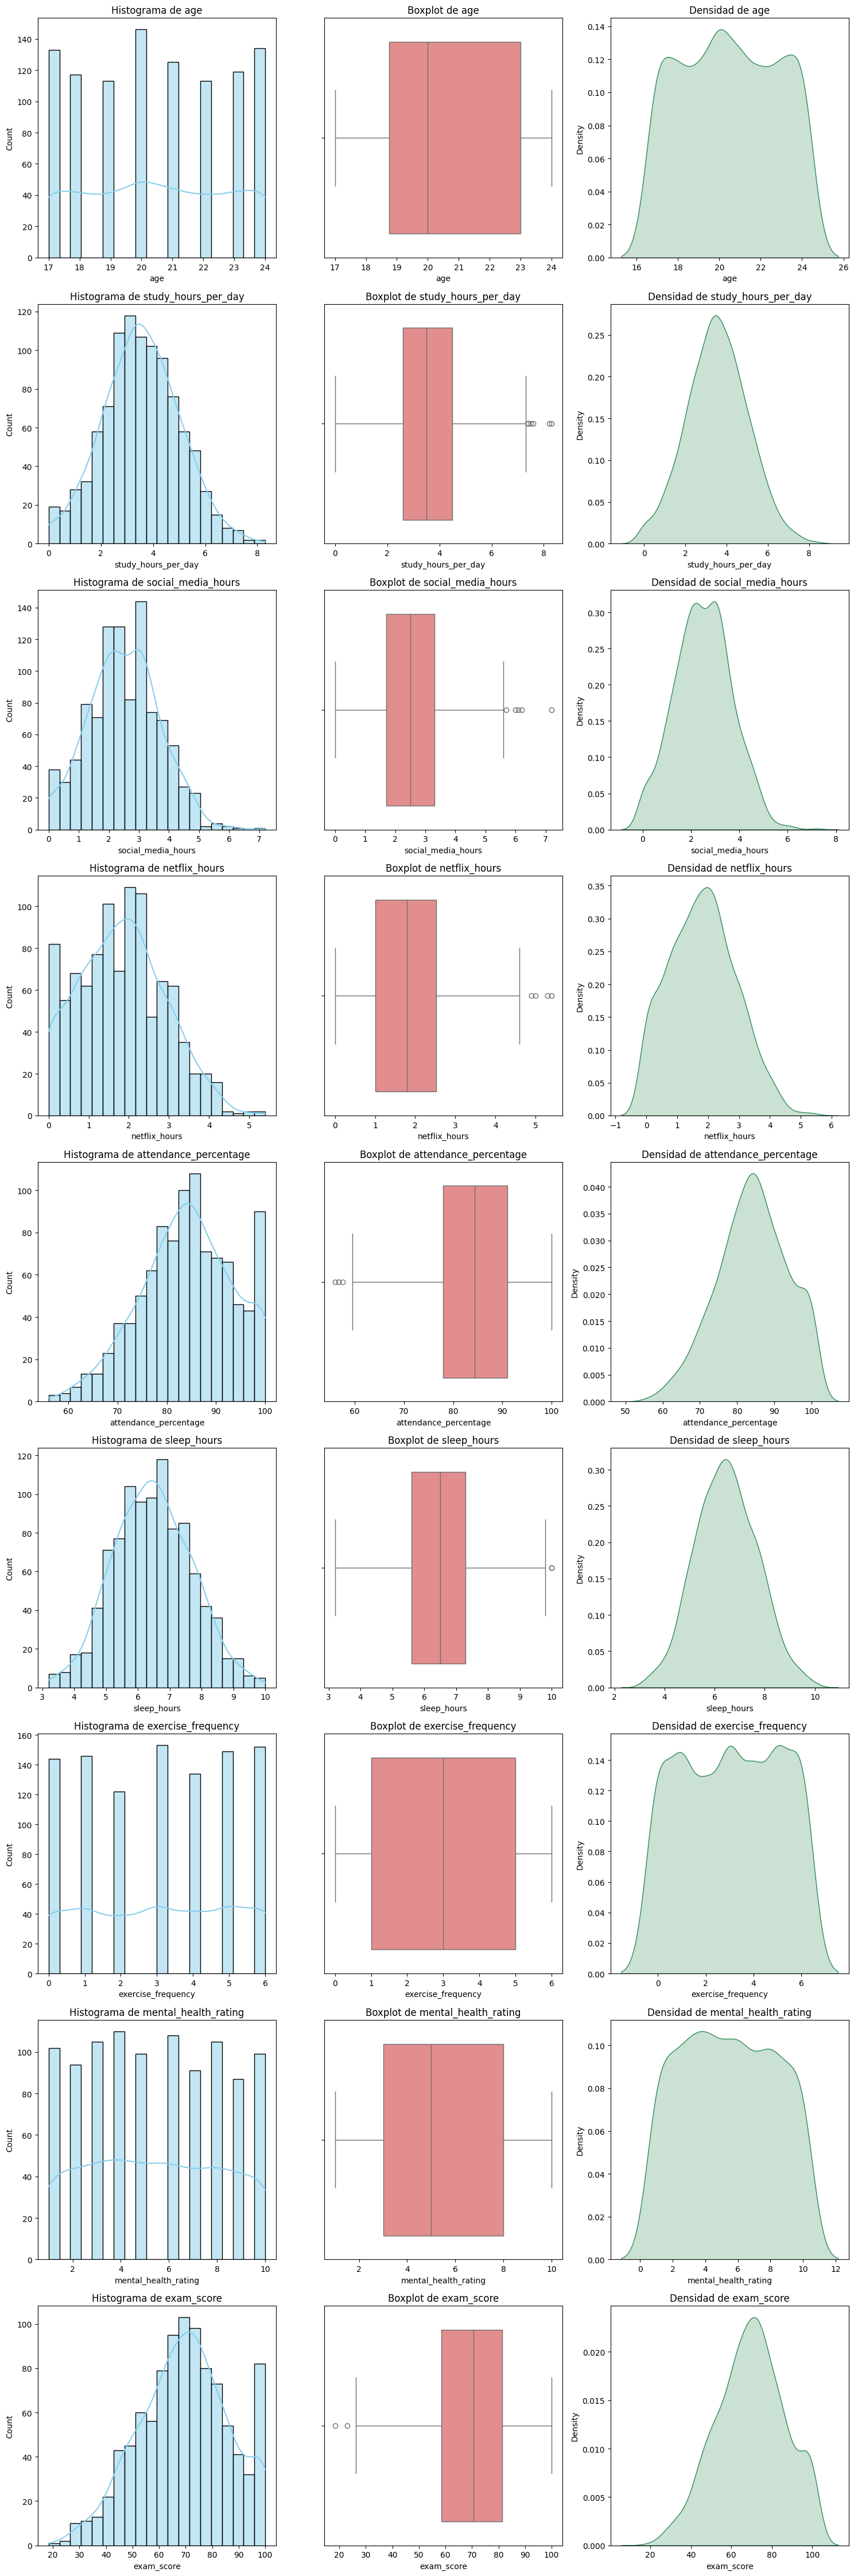

In [ ]:
#sns.set_style("whitegrid")

# Crear subplots para cada tipo de gráfico
fig, axes = plt.subplots(nrows=len(variables_cuantitativas), ncols=3, figsize=(15, 5 * len(variables_cuantitativas)))

for i, var in enumerate(variables_cuantitativas):
    # Histograma fila 1
    sns.histplot(df[var], bins=20, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot fila 2
    sns.boxplot(x=df[var], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot de {var}")

    # Gráfico de Densidad fila 3
    sns.kdeplot(df[var], fill=True, ax=axes[i, 2], color="seagreen")
    axes[i, 2].set_title(f"Densidad de {var}")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show();

# e. Verificación de la condición de normalidad mediante la prueba de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov.

In [ ]:
# import scipy.stats as stats

normalidad = {}

for var in variables_cuantitativas:
    # Prueba de Shapiro-Wilk: evalúa si una muestra de datos proviene de una distribución normal
    shapiro_stat, shapiro_p = stats.shapiro(df[var].dropna())
    # shapiro_test = stats.shapiro(df[var]) # Otra forma


    # Prueba de Kolmogorov-Smirnov: compara la distribución de una muestra de datos con una distribución teórica
    ks_stat, ks_p = stats.kstest(df[var].dropna(), 'norm', args=(df[var].mean(), df[var].std())) # Comparamos con la distribucion normal

    # Guardar resultados
    normalidad[var] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),
        "Kolmogorov-Smirnov p-valor": round(ks_p, 4),
        "Normalidad (p > 0.05)": shapiro_p > 0.05 and ks_p > 0.05 # Conclusión final para cada variable
    }

# Diccionario a DataFrame
resultados_df = pd.DataFrame(normalidad).transpose()

print(resultados_df)
print("\nClaramente, social_media_hours y sleep_hours siguen una distribución normal, \nalgo que ya era apreciable en los gráficos con forma de campana de Gauss.\n")

                      Shapiro-Wilk p-valor Kolmogorov-Smirnov p-valor  \
age                                    0.0                        0.0   
study_hours_per_day                 0.1065                     0.6136   
social_media_hours                  0.0007                     0.2603   
netflix_hours                          0.0                     0.0322   
attendance_percentage                  0.0                     0.0298   
sleep_hours                         0.0888                     0.3381   
exercise_frequency                     0.0                        0.0   
mental_health_rating                   0.0                        0.0   
exam_score                             0.0                     0.1475   

                      Normalidad (p > 0.05)  
age                                   False  
study_hours_per_day                    True  
social_media_hours                    False  
netflix_hours                         False  
attendance_percentage                 F

# f. Interpretación de los resultados obtenidos.

- Los datos tienen distribuciones propias y características del tipo de dato que son, y están relacionado esntre sí. El único dato extraño es el de exam_score, ya que no sigue una campana de gauss normal y después ésto nos dará problemas a la hora de establecer el modelo de regresión.

- Las distribuciones age, exercise_frequency y mental_health_rating tienen una distribución bastante homogénea, con pequeños picos de modas, pero en mi opinión parece demasiado artificial ya que no creo que una muestra real tenga éstos resultados.

# 3. ANÁLISIS DESCRIPTIVO DE VARIABLES CATEGÓRICAS

# a. Selección entre 2-4 variables categóricas.

In [ ]:
# Filtrar columnas categóricas que no sean binarias ni numéricas
# También excluimos student_id ya que no es una variable
categorical_vars = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if df[col].nunique() > 2 and not df[col].str.contains('%').any() and col != 'student_id'
]

print("VARIABLES CATEGÓRICAS:\n")

# Mostrar solo el nombre de las columnas
for col in categorical_vars:
    print(col)




VARIABLES CATEGÓRICAS:

gender
diet_quality
parental_education_level
internet_quality


# b. Cálculo de frecuencias absolutas y relativas.

In [ ]:
for col in categorical_vars:
    print(f"Frecuencia absoluta de {col}:")
    print(df[col].value_counts())

    print(f"\nFrecuencia relativa de {col}:")
    print(df[col].value_counts(normalize=True))
    print("\n" + "="*50)

Frecuencia absoluta de gender:
gender
Female    481
Male      477
Other      42
Name: count, dtype: int64

Frecuencia relativa de gender:
gender
Female    0.481
Male      0.477
Other     0.042
Name: proportion, dtype: float64

Frecuencia absoluta de diet_quality:
diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64

Frecuencia relativa de diet_quality:
diet_quality
Fair    0.437
Good    0.378
Poor    0.185
Name: proportion, dtype: float64

Frecuencia absoluta de parental_education_level:
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

Frecuencia relativa de parental_education_level:
parental_education_level
High School    0.431243
Bachelor       0.385039
Master         0.183718
Name: proportion, dtype: float64

Frecuencia absoluta de internet_quality:
internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64

Frecuencia relativa de internet_quality:
internet_quality
Good    

# c. Visualización de los datos: gráficos de barras, diagramas de tarta y gráficos de mosaico.

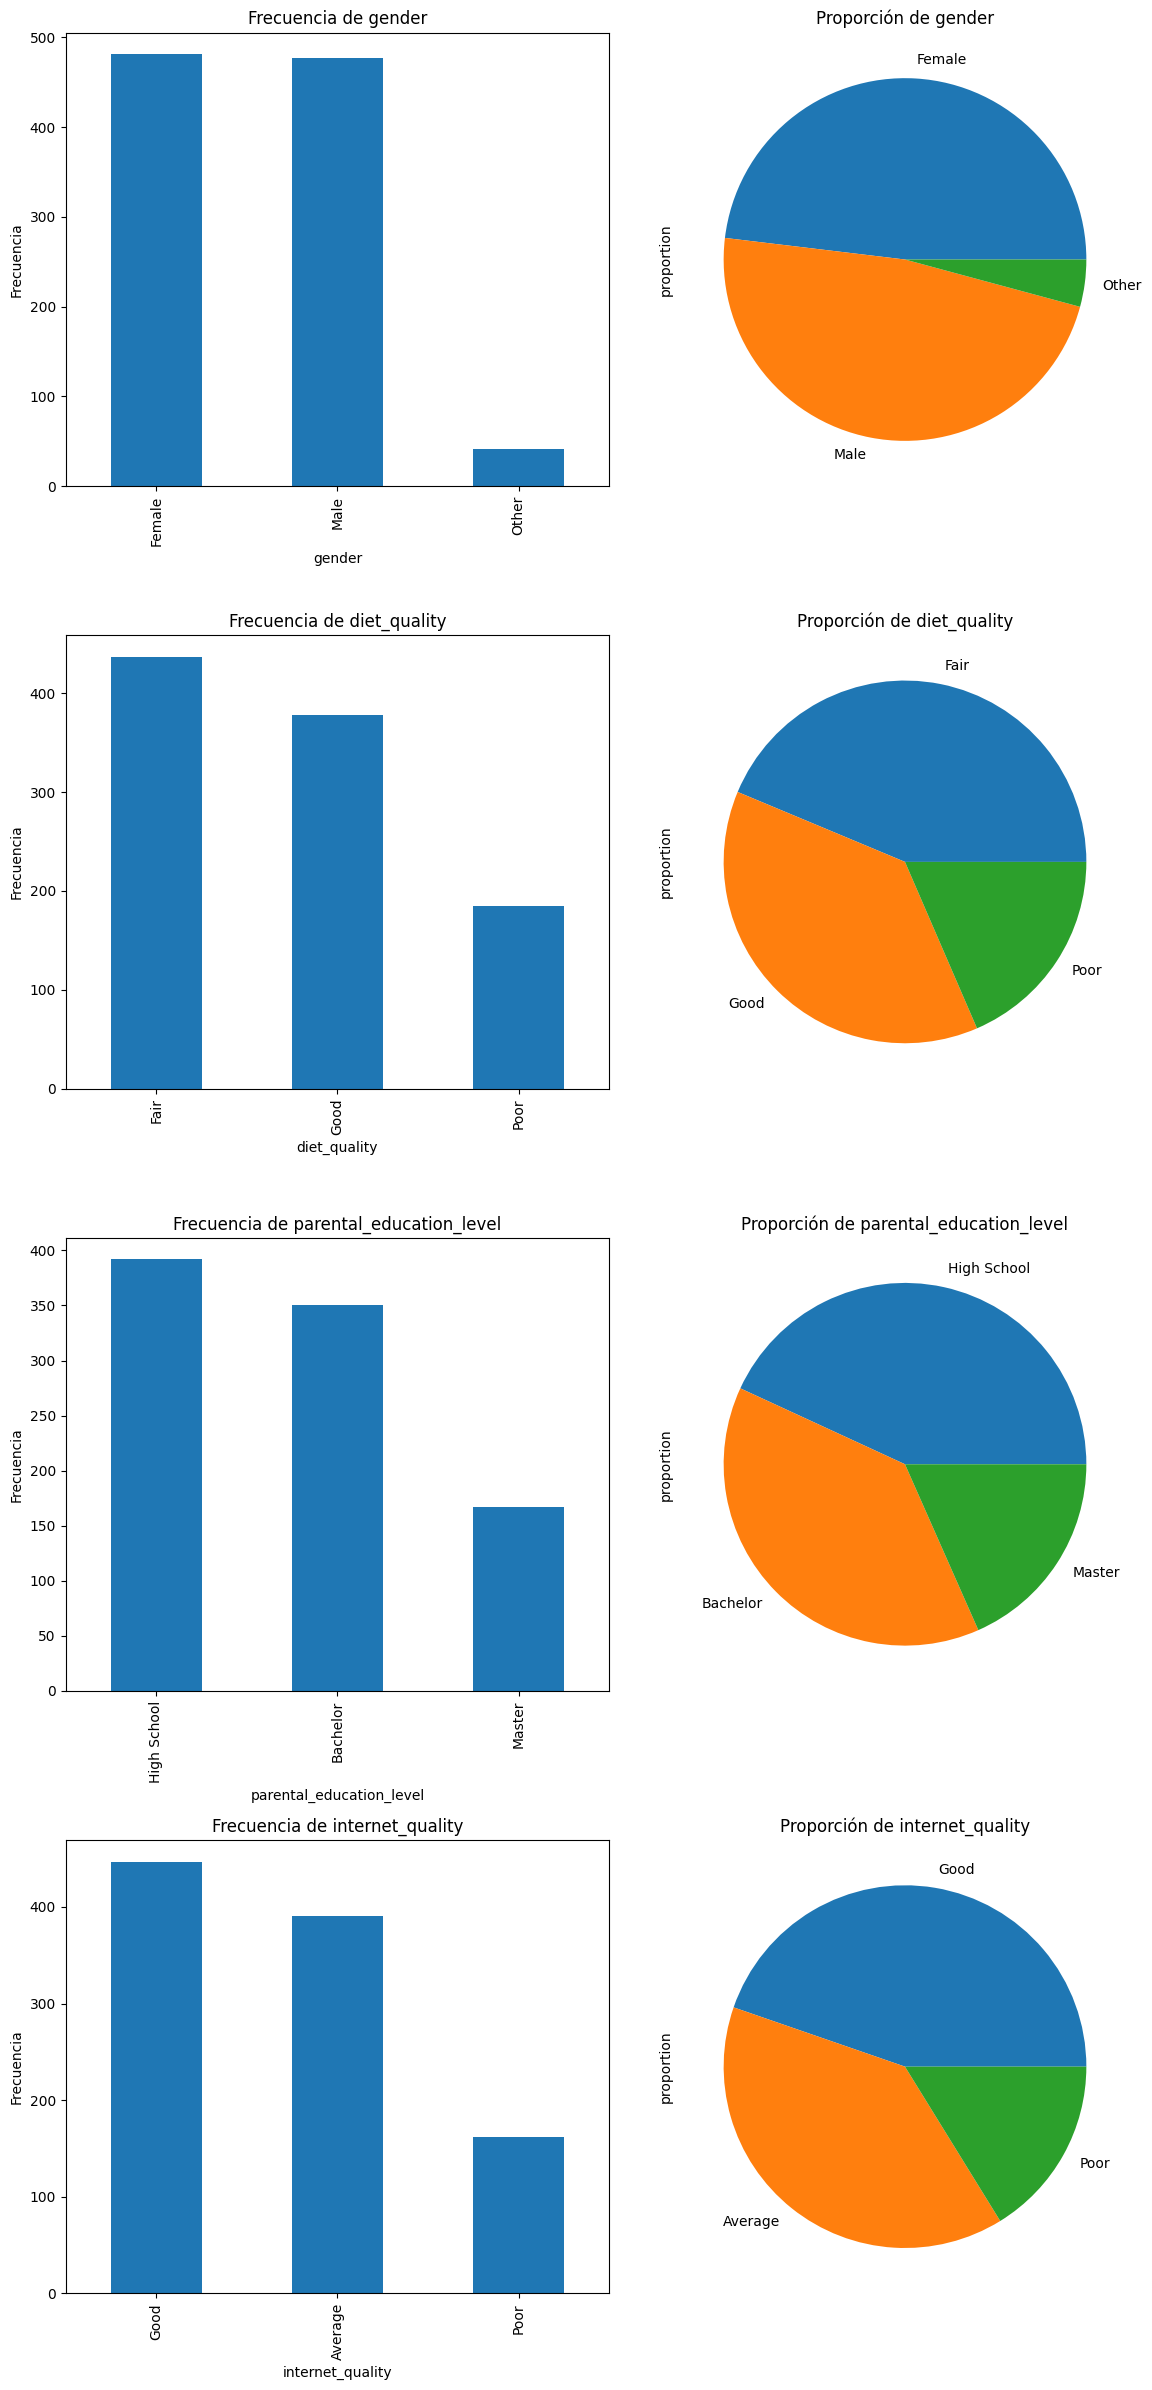

In [ ]:


# Crear subgráficos: dos columnas para cada gráfico
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=2, figsize=(12, 6 * len(categorical_vars)))

# Iterar sobre las variables categóricas y graficar
for i, col in enumerate(categorical_vars):
    # Gráfico de barras (frecuencia absoluta)
    df[col].value_counts().plot(kind='bar', ax=axes[i, 0], title=f'Frecuencia de {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')

    # Gráfico de tarta (frecuencia relativa)
    df[col].value_counts(normalize=True).plot(kind='pie', ax=axes[i, 1], title=f'Proporción de {col}')

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show();


<Figure size 800x600 with 0 Axes>

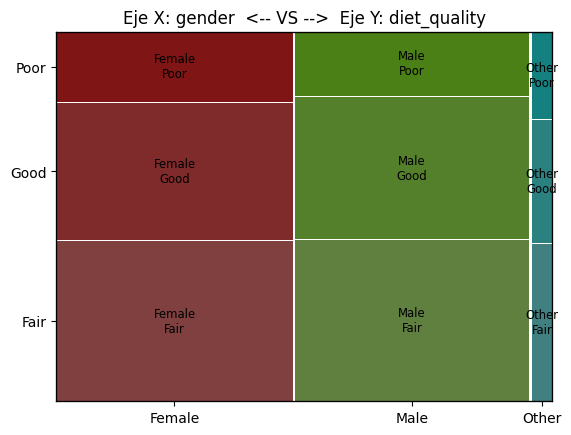

<Figure size 800x600 with 0 Axes>

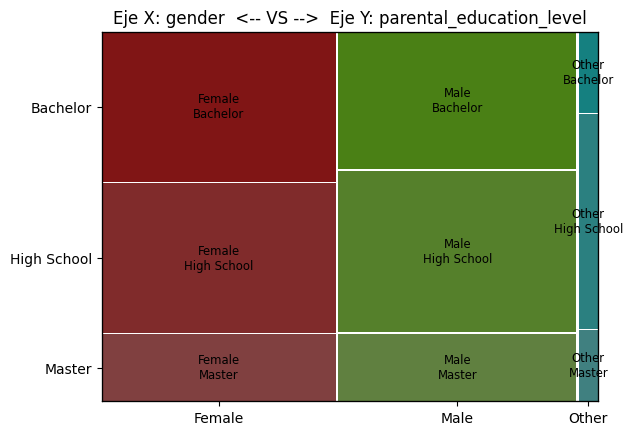

<Figure size 800x600 with 0 Axes>

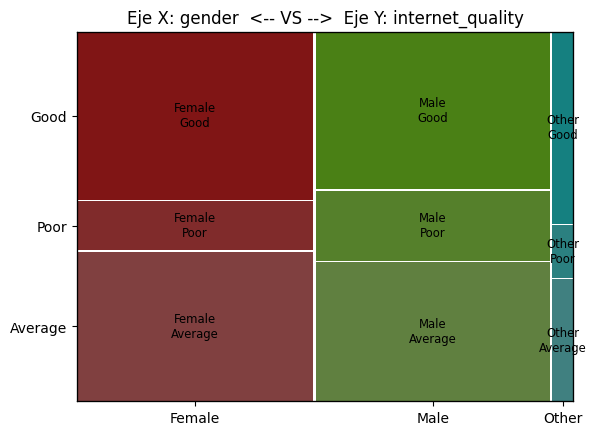

<Figure size 800x600 with 0 Axes>

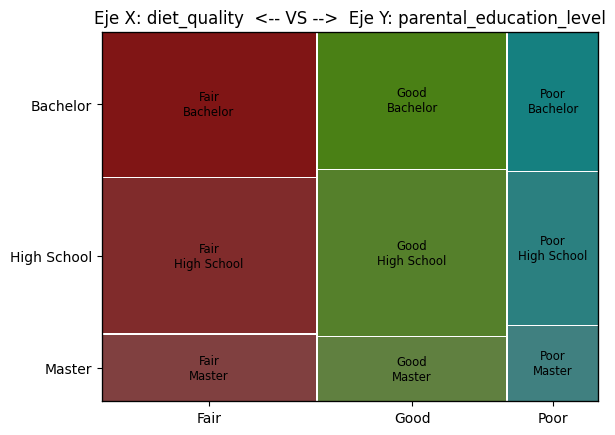

<Figure size 800x600 with 0 Axes>

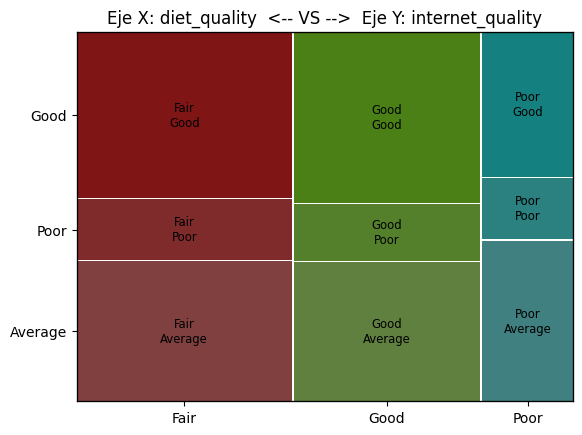

<Figure size 800x600 with 0 Axes>

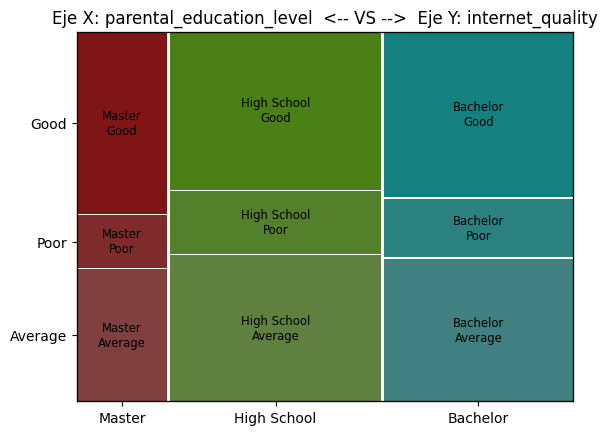

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

for i in range(len(categorical_vars)-1):
    for j in range(i+1, len(categorical_vars)):
        plt.figure(figsize=(8, 6))
        mosaic(df, [categorical_vars[i], categorical_vars[j]])
        plt.title(f'Eje X: {categorical_vars[i]}  <-- VS -->  Eje Y: {categorical_vars[j]}')

        plt.show()

# d. Análisis de la relación entre variables categóricas mediante tablas de contingencia y pruebas de Chi-cuadrado.

In [ ]:
import scipy.stats as stats
import pandas as pd

# Iterar sobre todas las combinaciones de pares de variables categóricas
for i in range(len(categorical_vars) - 1):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # Crear la tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Aplicar la prueba de Chi-cuadrado
        chi2_stat, p_valor, dof, esperados = stats.chi2_contingency(tabla_contingencia)

        print(f"\nRelación entre {var1} y {var2}:\n")
        print("Tabla de Contingencia:")
        print(tabla_contingencia)
        print(f"\nEstadístico de Chi-cuadrado: {chi2_stat:.2f}")
        print(f"Grados de libertad: {dof}")
        print(f"Valor p: {p_valor:.4f}")

        if p_valor < 0.05:
            print("CONCLUSIÓN: ✅ Existe una relación significativa entre las variables (rechazamos H0).")
        else:
            print("CONCLUSIÓN: ❌ No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).")

        print("\n" + "="*100)


Relación entre gender y diet_quality:

Tabla de Contingencia:
diet_quality  Fair  Good  Poor
gender                        
Female         210   179    92
Male           209   185    83
Other           18    14    10

Estadístico de Chi-cuadrado: 1.45
Grados de libertad: 4
Valor p: 0.8355
CONCLUSIÓN: ❌ No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).


Relación entre gender y parental_education_level:

Tabla de Contingencia:
parental_education_level  Bachelor  High School  Master
gender                                                 
Female                         177          177      79
Male                           165          194      81
Other                            8           21       7

Estadístico de Chi-cuadrado: 5.79
Grados de libertad: 4
Valor p: 0.2156
CONCLUSIÓN: ❌ No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).


Relación entre gender y internet_quality:

Tabla de Co

# e. Cálculo e interpretación de medidas de asociación como el coeficiente de contingencia y el Cramér's V.

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np

# Iterar sobre todas las combinaciones de variables categóricas
for i in range(len(categorical_vars) - 1):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # Tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Prueba de Chi-cuadrado
        chi2_stat, p_valor, dof, esperados = stats.chi2_contingency(tabla_contingencia)

        # Coeficiente de Contingencia (C)
        n = np.sum(tabla_contingencia.values)  # Total de observaciones
        coef_contingencia = np.sqrt(chi2_stat / (chi2_stat + n))

        # Cálculo de Cramér's V
        k = min(tabla_contingencia.shape) - 1  # Mínimo de filas o columnas - 1
        cramer_v = np.sqrt(chi2_stat / (n * k))

        # Mostrar resultados
        print(f"\nRelación entre {var1} y {var2}:")
        print(f"Coeficiente de Contingencia: {coef_contingencia:.3f}")
        print(f"Cramér's V: {cramer_v:.3f}")

        # Interpretación de Cramér’s V según regla de thumb
        if cramer_v < 0.10:
            interpretacion = "❌ Asociación muy débil"
        elif cramer_v < 0.30:
            interpretacion = "Asociación débil"
        elif cramer_v < 0.50:
            interpretacion = "Asociación moderada"
        else:
            interpretacion = "✅ Asociación fuerte"

        print(f"Interpretación de Cramér's V: {interpretacion}")

        print("\n" + "="*100)



Relación entre gender y diet_quality:
Coeficiente de Contingencia: 0.038
Cramér's V: 0.027
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre gender y parental_education_level:
Coeficiente de Contingencia: 0.080
Cramér's V: 0.056
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre gender y internet_quality:
Coeficiente de Contingencia: 0.080
Cramér's V: 0.057
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre diet_quality y parental_education_level:
Coeficiente de Contingencia: 0.037
Cramér's V: 0.026
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre diet_quality y internet_quality:
Coeficiente de Contingencia: 0.054
Cramér's V: 0.038
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre parental_education_level y internet_quality:
Coeficiente de Contingencia: 0.048
Cramér's V: 0.034
Interpretación de Cramér's V: ❌ Asociación muy débil



## f. Interpretación del análisis de variables categóricas



El análisis de los datos (sobretodo en las gráficas) nos deja ver que se trata de un conjunto de datos casi simétrico entre sus categorías principales (2 opciones mayoritarias con casi la misma cantidad y una tercera con una pequeña cantidad de excepciones). Ésto evidencia que se trata de un conjunto de datos artificial hecho de manera que no vamos a tener relaciones entre los datos, tal y como después hemos podido comprobar en los puntos d. y e.


# 4. ANÁLISIS DESCRIPTIVO DE VARIABLES BINARIAS

# a. Selección entre 2-4 variables binarias.

In [ ]:
binary_vars = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() == 2] # solo binarias

print("Variables binarias:", binary_vars, "\n")

for col in binary_vars:
    print(f"{col}: {df[col].unique()}")



Variables binarias: ['part_time_job', 'extracurricular_participation'] 

part_time_job: ['No' 'Yes']
extracurricular_participation: ['Yes' 'No']


# b. Cálculo de proporciones y frecuencias.

In [ ]:
for col in binary_vars:
    print(f"\nVariable: {col}")

    # Frecuencia absoluta
    frecuencias_abs = df[col].value_counts()
    print("Frecuencias absolutas:")
    print(frecuencias_abs)

    # Frecuencia relativa (proporciones)
    frecuencias_rel = df[col].value_counts(normalize=True)
    print("\nFrecuencias relativas (proporciones):")
    print(frecuencias_rel.round(2))

    print("\n" + "="*50)



Variable: part_time_job
Frecuencias absolutas:
part_time_job
No     785
Yes    215
Name: count, dtype: int64

Frecuencias relativas (proporciones):
part_time_job
No     0.78
Yes    0.22
Name: proportion, dtype: float64


Variable: extracurricular_participation
Frecuencias absolutas:
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64

Frecuencias relativas (proporciones):
extracurricular_participation
No     0.68
Yes    0.32
Name: proportion, dtype: float64



# c. Visualización de los datos: gráficos de barras.

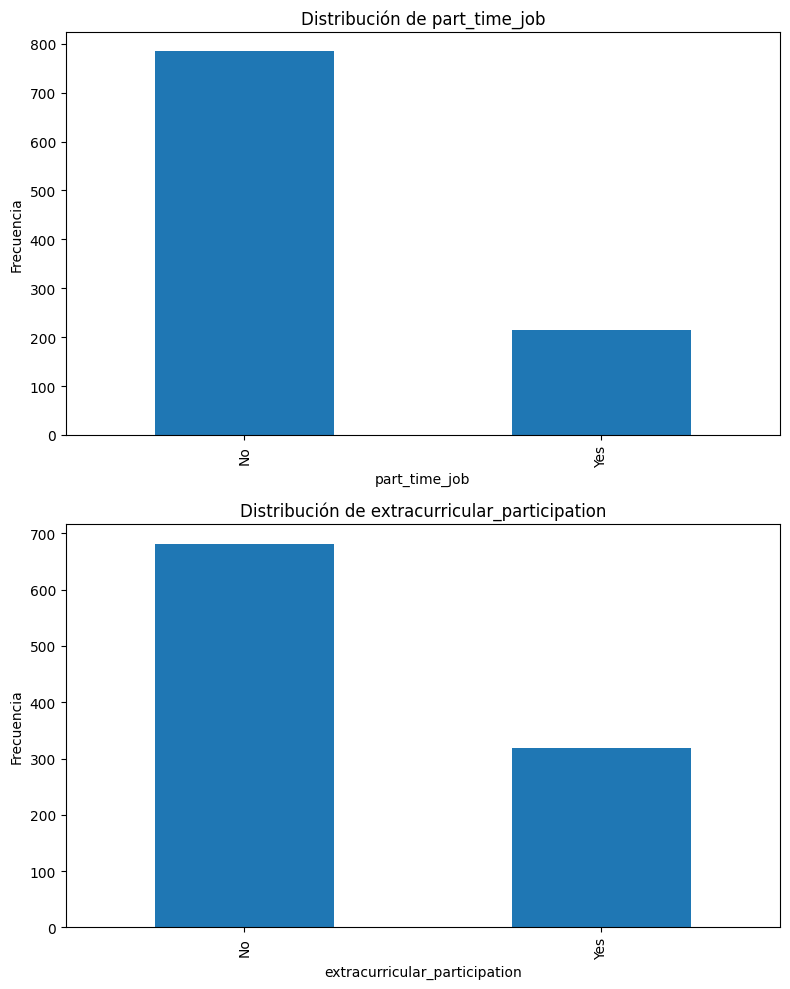

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(binary_vars), ncols=1, figsize=(8, 5 * len(binary_vars)))

for i, col in enumerate(binary_vars):
    ax = axes[i] if len(binary_vars) > 1 else axes

    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show();


# d. Análisis de la relación entre variables binarias utilizando tablas de contingencia.

In [ ]:
for i in range(len(binary_vars) - 1):
    for j in range(i + 1, len(binary_vars)):
        var1, var2 = binary_vars[i], binary_vars[j]  # Seleccionar par de variables

        # Crear la tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Mostrar resultados
        print(f"\nTabla de Contingencia entre {var1} y {var2}:\n")
        print(tabla_contingencia)
        print("=" * 100)



Tabla de Contingencia entre part_time_job y extracurricular_participation:

extracurricular_participation   No  Yes
part_time_job                          
No                             531  254
Yes                            151   64


# e. Cálculo del coeficiente de correlación Phi y visualización mediante matrices de correlación Phi.

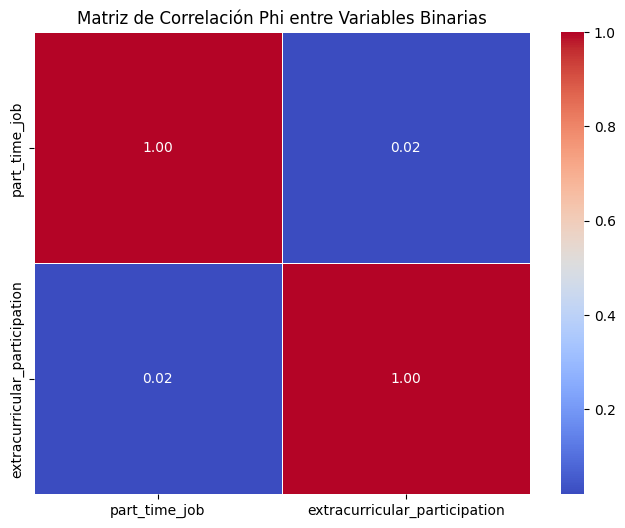

In [ ]:
from scipy.stats import chi2_contingency

# Crear matriz de correlación Phi
phi_corr_matrix = pd.DataFrame(np.zeros((len(binary_vars), len(binary_vars))),
                               index=binary_vars, columns=binary_vars)

# Calcular coeficiente Phi para cada par de variables binarias
for i in range(len(binary_vars)):
    for j in range(i, len(binary_vars)):  # i, j para evitar duplicados
        if i == j:
            phi_corr_matrix.iloc[i, j] = 1.0  # La diagonal siempre es 1
        else:
            var1, var2 = binary_vars[i], binary_vars[j]
            tabla = pd.crosstab(df[var1], df[var2])
            chi2, _, _, _ = chi2_contingency(tabla)  # Test de Chi-cuadrado
            n = df.shape[0]  # Tamaño total de la muestra
            phi = np.sqrt(chi2 / n)  # Cálculo del coeficiente Phi
            phi_corr_matrix.iloc[i, j] = phi
            phi_corr_matrix.iloc[j, i] = phi  # Matriz simétrica

# Visualizar la matriz de correlación Phi
plt.figure(figsize=(8, 6))
sns.heatmap(phi_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Phi entre Variables Binarias")
plt.show()


# f. Aplicación de la prueba t-Student para comparar grupos definidos por variables binarias y análisis de significancia.

In [ ]:
from scipy import stats

variable_cuantitativa = 'exam_score'

# Aplicar la prueba t-Student para cada variable binaria y comparar las medias
for var_bin in binary_vars:
    print(f"\nPrueba t-Student para comparar grupos según {var_bin}:")

    # Separar los datos en dos grupos según la variable binaria
    group1 = df[df[var_bin] == df[var_bin].unique()[0]][variable_cuantitativa]  # Primer grupo
    group2 = df[df[var_bin] == df[var_bin].unique()[1]][variable_cuantitativa]  # Segundo grupo

    # Realizar la prueba t
    t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())  # Realizar la prueba t

    # Mostrar los resultados
    print(f"  Estadístico t: {t_stat:.3f}")
    print(f"  p-valor: {p_value:.3f}")

    # Análisis de significancia
    if p_value < 0.05:
        print(f"✅ La diferencia entre los grupos es estadísticamente significativa (p < 0.05).")
    else:
        print(f"❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).")

    print("="*100)



Prueba t-Student para comparar grupos según part_time_job:
  Estadístico t: 0.841
  p-valor: 0.401
❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).

Prueba t-Student para comparar grupos según extracurricular_participation:
  Estadístico t: 0.028
  p-valor: 0.978
❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).


# 5. RELACIONES ENTRE VARIABLES

# a. Modelo PCA completo con variables cuantitativas, categóricas y binarias.

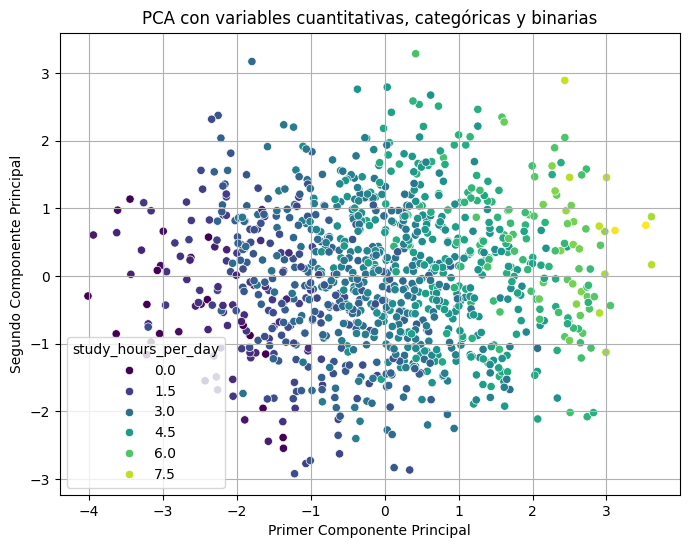

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Estandarizamos todas las variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_cuantitativas),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('pca', PCA(n_components=2))
])

pca_result = pipeline.fit_transform(df)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=df['study_hours_per_day'], palette='viridis')
plt.title('PCA con variables cuantitativas, categóricas y binarias')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.grid(True)
plt.show()

La PCA no arroja ninguna información de clústers ni agrupamientos en torno a variables categóricas, ya que los datos son generados y aquí es apreciable el ruido de los datos aleatorios de las variables categóricas. Lo único que puedo hacer para arrojar información con el gráfico es mostrar que la relación con una variable cuantitativa como las horas de estudio al día, que aparecen ordenadas y relacionadas con otras variables cuantitativas, según puede apreciarse.

# b. Generar un modelo de regresión lineal, seleccionando una de las variables cuantitativas como la respuesta. Antes de interpretar el modelo, validar los residuos y valorar si parece interesante incluir términos cuadráticos y/o interacciones.

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     378.5
Date:                Sun, 04 May 2025   Prob (F-statistic):               0.00
Time:                        19:23:38   Log-Likelihood:                -2475.9
No. Observations:                 800   AIC:                             4992.
Df Residuals:                     780   BIC:                             5085.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.6224      0.512    137.828      0.0

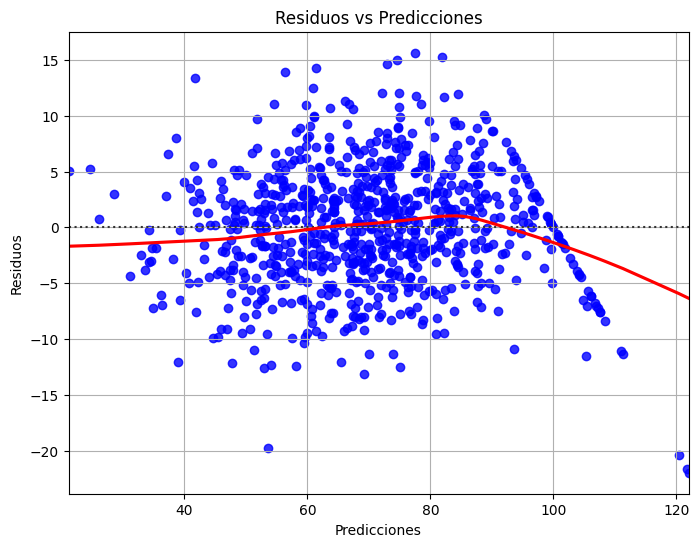

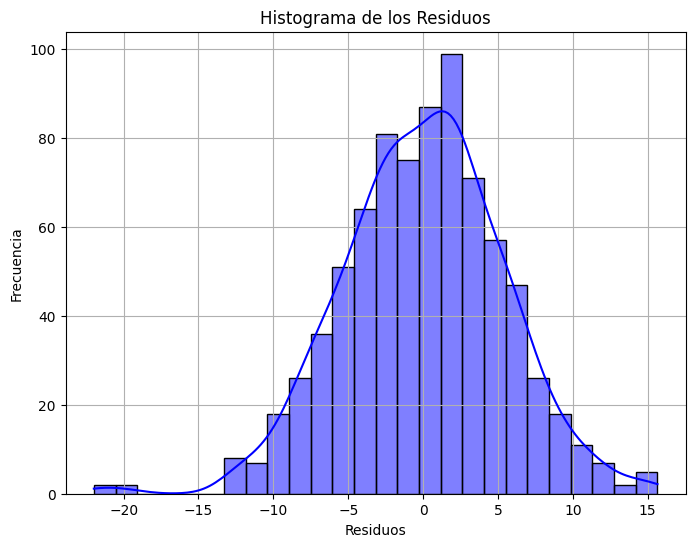

<Figure size 800x600 with 0 Axes>

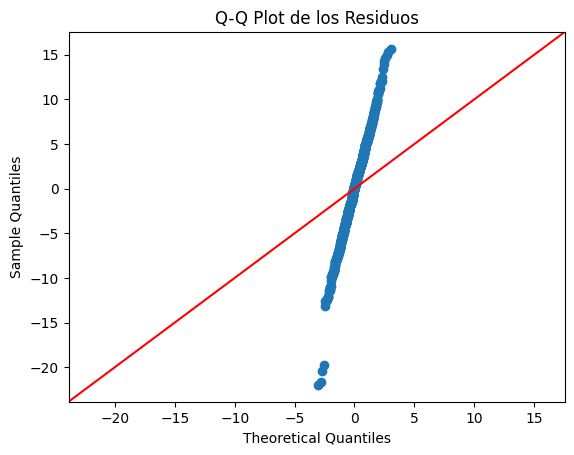

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

# Suponemos que df ya está cargado con los datos
# Variable dependiente
y = df['exam_score']
cols_to_drop = ['exam_score']
if 'student_id' in df.columns:
    cols_to_drop.append('student_id')

X = df.drop(columns=cols_to_drop)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variables numéricas y categóricas
numerical_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_vars),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
    ]
)

# Transformar X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Modelo de regresión lineal con datos transformados
model = sm.OLS(y_train, sm.add_constant(X_train_transformed)).fit()
print(model.summary())

# Validación de residuos
residuals = y_train - model.fittedvalues

# Gráfico residuos vs predicciones
plt.figure(figsize=(8, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, color="blue", line_kws={'color': 'red'})
plt.title('Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot de residuos
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot de los Residuos')
plt.show()


## Valoración de los resultados:

- En el gráfico de residuos vs predicciones podemos apreciar que los residuos se agrupan en torno a 70x - 0y, y también se forma una recta descendente de 90x - 10y a 110x - -10y.
Todo esto nos indica que el modelo no está bien ajustado, ya que los residuos deberían de estar distribuidos por todo el eje de residuos 0 y no debería de existir ningún patrón como la recta.

- Según el histograma de residuos, el modelo está ajustado correctamente con la regresión simple, al tener los datos distribuídos alrededor y centrados en cero.

- Según el Q-Q plot, los puntos no se alinean con la línea de referencia x = y, lo que indica que los residuos no siguen una distribución normal.

Se hace necesario aplicar un modelo polinómico que incluya términos cuadráticos e interacciones:

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 04 May 2025   Prob (F-statistic):          4.05e-259
Time:                        19:23:40   Log-Likelihood:                -2346.2
No. Observations:                 800   AIC:                             5078.
Df Residuals:                     607   BIC:                             5982.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.8774      1.075     65.029      0.0

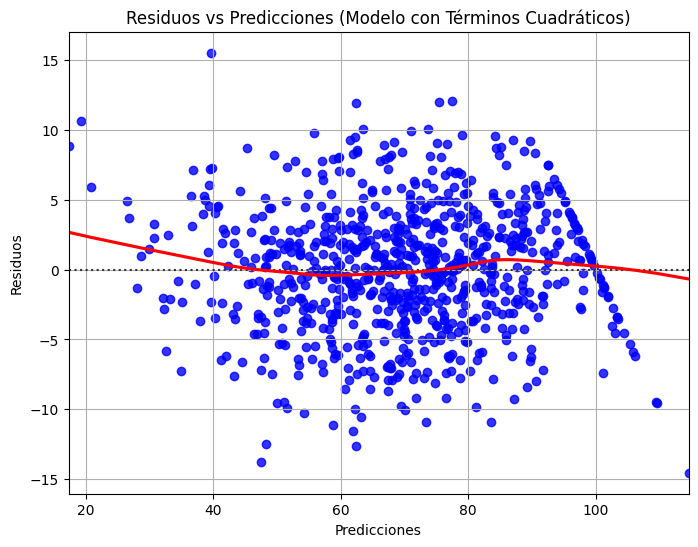

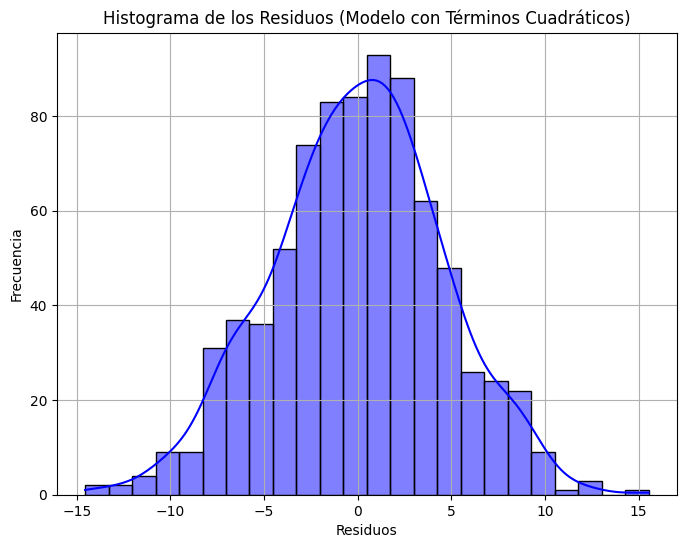

<Figure size 800x600 with 0 Axes>

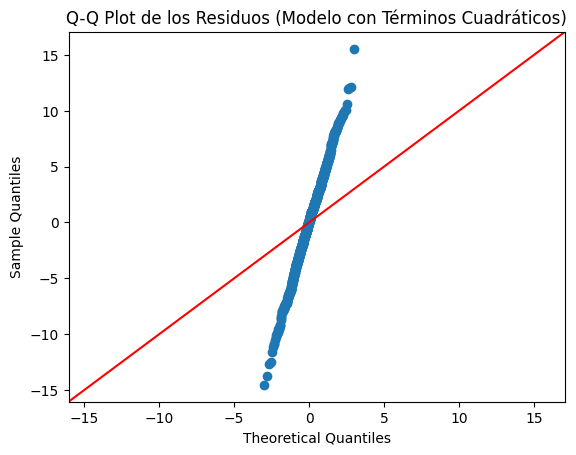

In [ ]:
y = df['exam_score']
cols_to_drop = ['exam_score']
if 'student_id' in df.columns:
    cols_to_drop.append('student_id')

X = df.drop(columns=cols_to_drop)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Variables numéricas y categóricas
numerical_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_vars),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_vars)
    ]
)

# Transformar X_train
X_train_transformed = preprocessor.fit_transform(X_train)

# Aplicar PolynomialFeatures para obtener términos cuadráticos e interacciones (grado 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_transformed)

# Ajustar el modelo de regresión lineal con los datos polinómicos
model_poly = sm.OLS(y_train, sm.add_constant(X_poly_train)).fit()

# Ver el resumen del modelo polinómico
print(model_poly.summary())

# Validación de residuos
residuals_poly = y_train - model_poly.fittedvalues

# Gráfico residuos vs predicciones del modelo polinómico
plt.figure(figsize=(8, 6))
sns.residplot(x=model_poly.fittedvalues, y=residuals_poly, lowess=True, color="blue", line_kws={'color': 'red'})
plt.title('Residuos vs Predicciones (Modelo con Términos Cuadráticos)')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

# Histograma de residuos del modelo polinómico
plt.figure(figsize=(8, 6))
sns.histplot(residuals_poly, kde=True, color="blue")
plt.title('Histograma de los Residuos (Modelo con Términos Cuadráticos)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Q-Q plot de residuos del modelo polinómico
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_poly, line='45')
plt.title('Q-Q Plot de los Residuos (Modelo con Términos Cuadráticos)')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocesar el conjunto de prueba usando el mismo preprocessor ya entrenado
X_test_transformed = preprocessor.transform(X_test)

# Predicciones del modelo lineal
y_pred = model.predict(sm.add_constant(X_test_transformed))

# Métricas de evaluación del modelo lineal
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nEvaluación del modelo lineal sobre el conjunto de prueba:")
print(f"R²:   {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")

# Predicciones del modelo polinómico
X_test_poly = poly.transform(X_test_transformed)
y_pred_poly = model_poly.predict(sm.add_constant(X_test_poly))

# Métricas del modelo polinómico
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print("\nEvaluación del modelo polinómico sobre el conjunto de prueba:")
print(f"R²:   {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"MAE:  {mae_poly:.4f}")



Evaluación del modelo lineal sobre el conjunto de prueba:
R²:   0.8968
RMSE: 5.1455
MAE:  4.1893

Evaluación del modelo polinómico sobre el conjunto de prueba:
R²:   0.8890
RMSE: 5.3362
MAE:  4.2986


## Valoración final de las regresiones:
Podemos apreciar, tanto gráficamente como con esta última tabla, que el modelo polinómico no se ajusta a los datos mejor que el modelo lineal, mostrando de hecho unos resultados prácticamente idénticos.

Una de las razones por las que el modelo no se ajusta bien es que ***la variable que pretendemos predecir (exam_score), no sigue una distribución normal***, las variables study_hours_per_day y sleep_hours sí se ajustan más al modelo, aunque continúan sin ajustarse correctamente a la línea de referencia en la gráfica Q-Q plot de residuos.

Si queremos conseguir predicciones sólidas, va ser necesario recurrir a otras herramientas no contempladas en este ejercicio.

Una razón muy posible por la que es tan difícil encontrar un modelo satisfactorio en éste conjunto de datos es la naturaleza aleatoria de la generación del dataset. Las variables cuantitativas sí guardan relaciones con otras variables, pero las categóricas son totalmente aleatorias, no teniendo ninguna relación con las cuantitativas.

# 6. CONCLUSIONES

# a. Resumen de los hallazgos más importantes.

1. La variable más importante, exam_score, no sigue una distribución normal, por lo que los ejercicios de regresión han resultado insatisfactorios.
2. Ninguna de las variables categóricas guardan relaciones entre sí.
3. El PCA indica que no existe absolutamente ninguna relación entre las variables categóricas.
4. Los dos modelos de regresión no se ajustan a los datos, y por tanto es imposible sacar predicciones. Existen dos razones:



*   Las variables con datos aleatorios no tienen relaciones entre sí, algo apreciable en las gráficas de "residuos vs predicciones".

*   La variable objetivo, exam_score, no tiene una distribución normal, por lo que es necesario utilizar otros modelos para ajustarse a los datos.






# b. Reflexión sobre la utilidad del análisis descriptivo en la comprensión de los datos.

- La visualización de estadísticos y tablas da al analista la capacidad de discernir la naturaleza de los datos. De no hacerse, habría casos como en el del PCA o los modelos de regresión, en el que el analista podría no llegar a comprender porqué su modelo no se ajusta y da éste tipo de resultado.

- A pesar de la decepción al no poder sacar información relevante de éste dataset, el estudio de conjuntos de datos generados otorga una experiencia que nos permite detectar datos anómalos o falseados en otros datasets en el futuro.

# c. Posibles limitaciones del análisis y sugerencias para futuros estudios.

LIMITACIONES:

1. La limitación más clara es la mala calidad del dataset, el cual consta de datos generados que, al menos en las variables categóricas, no aportan ningun patrón ni relaciones entre ellos, lo cual es apreciable en las pruebas Chi-cuadrado, medidas de asociación y el PCA del punto 5.

2. La variable exam_score, al no ser normal, hace inútil el intento de generar un modelo normal predictivo. Es necesario el uso de otras herramientas para buscar un modelo que funcione (imaginando unos datos de mejor calidad).

SUGERENCIAS PARA FUTUROS ESTUDIOS:

1. Desde luego, vista la mala experiencia con este dataset, voy a ser mucho más celoso a la hora de elegir datos generados, aunque dispongan de buena puntuación en kaggle.

2. En el punto 4, habría preferido tener más de 2 variables binarias para analizar, ya que solo 2 no aportan nada de información relevante en el punto 4.e.
